<a href="https://colab.research.google.com/github/Anirudh-2712/Exploratory-Data-analysis/blob/main/Module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Data Analysis (module 5)

### Anirudh Agrawal
### 22BCE2191
### C2 slot


## K-Means Clustering

importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Generating Elbow graph

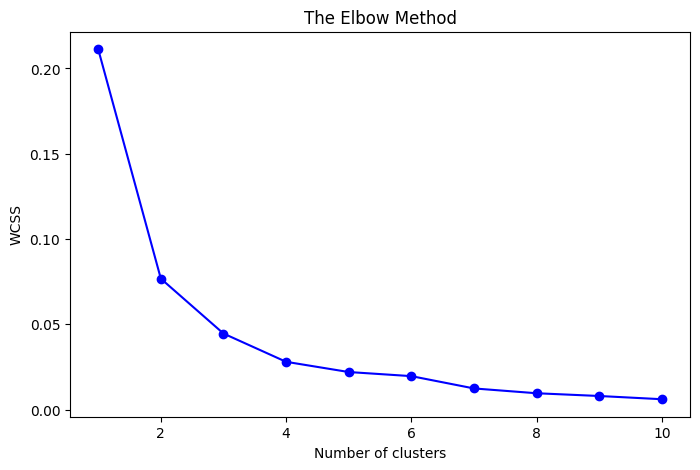

In [5]:
crime_data = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Crime.csv')

X = crime_data[['crmrte', 'polpc']].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Choosing 3 as the optimal number of clusters from the elbow graph generated

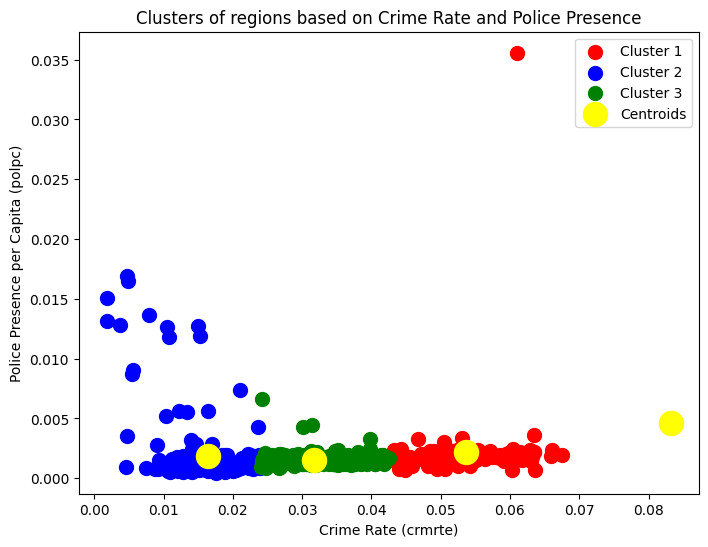

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of regions based on Crime Rate and Police Presence')
plt.xlabel('Crime Rate (crmrte)')
plt.ylabel('Police Presence per Capita (polpc)')
plt.legend()
plt.show()

## Hierarchical Clustering


Import Necessary Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

Visualize Distributions with Histograms

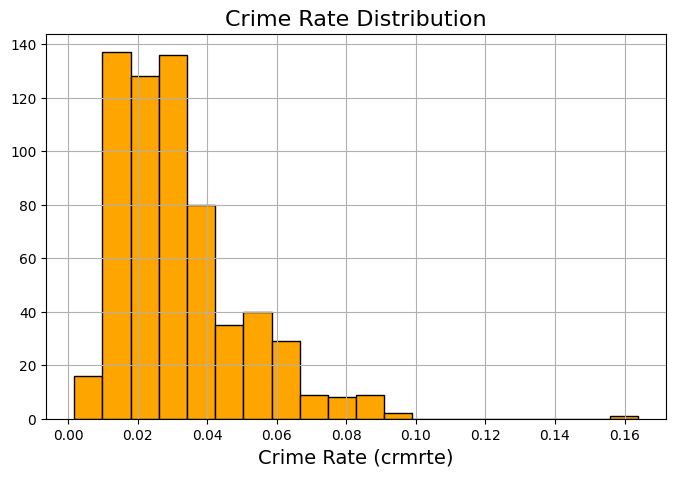

In [8]:
plt.figure(figsize=(8,5))
plt.title("Crime Rate Distribution", fontsize=16)
plt.xlabel("Crime Rate (crmrte)", fontsize=14)
plt.grid(True)
plt.hist(crime_data['crmrte'], color='orange', edgecolor='k', bins=20)
plt.show()


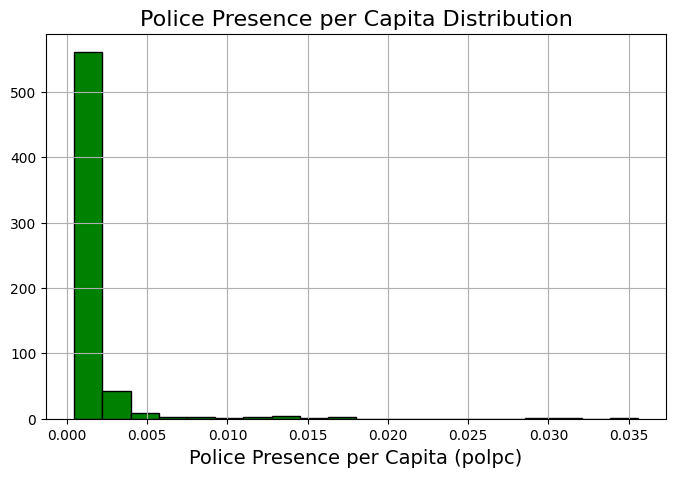

In [9]:
plt.figure(figsize=(8,5))
plt.title("Police Presence per Capita Distribution", fontsize=16)
plt.xlabel("Police Presence per Capita (polpc)", fontsize=14)
plt.grid(True)
plt.hist(crime_data['polpc'], color='green', edgecolor='k', bins=20)
plt.show()

Create Dendrogram to Determine Optimal Clusters

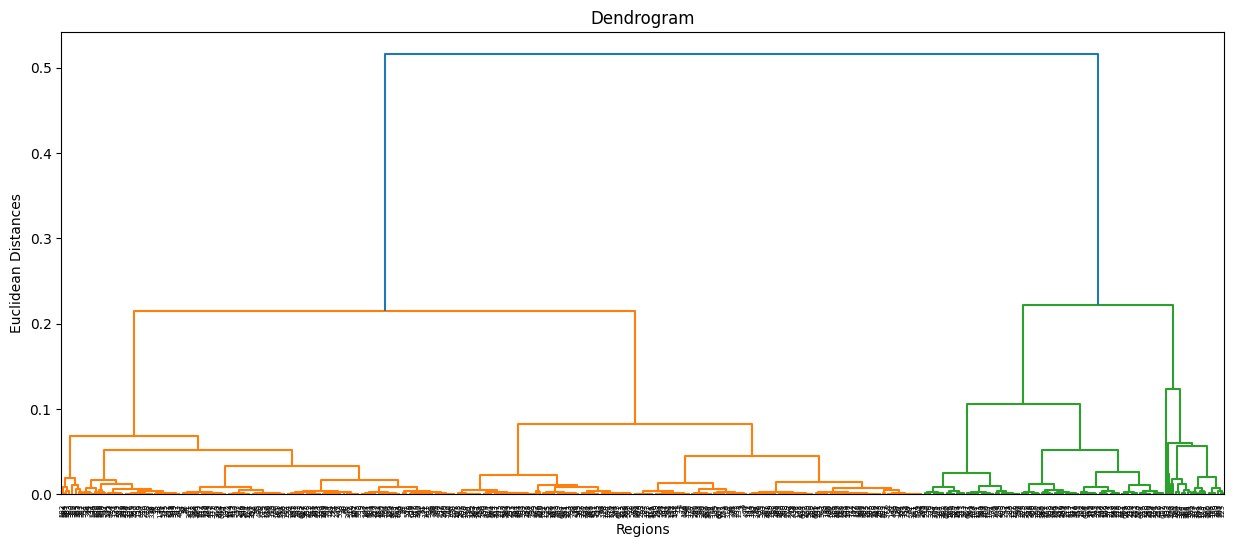

In [10]:
X = crime_data[['crmrte', 'polpc']].values

plt.figure(figsize=(15, 6))
plt.title('Dendrogram')
plt.xlabel('Regions')
plt.ylabel('Euclidean Distances')
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()


Adding a Horizontal Line to Identify Optimal Clusters

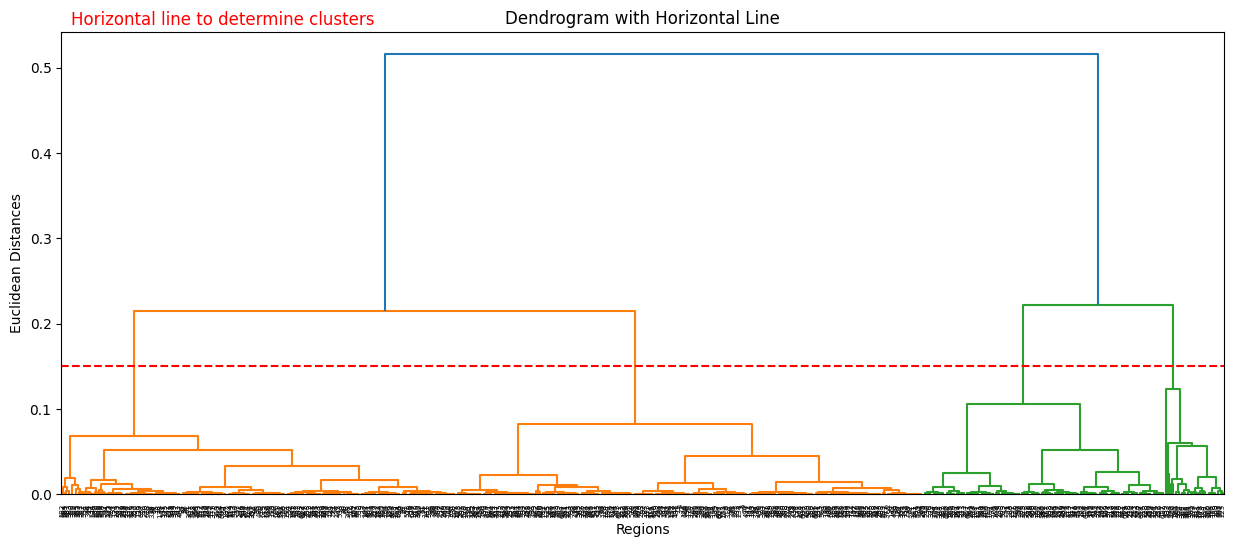

In [13]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram with Horizontal Line')
plt.xlabel('Regions')
plt.ylabel('Euclidean Distances')

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.axhline(y=0.15, color='r', linestyle='--')

plt.text(x=50, y=0.55, s='Horizontal line to determine clusters', fontsize=12, color='r')

plt.show()
